In [3]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

print("🚀 Çoklu Cryptocurrency Analizi Başlıyor...")

# Analiz edilecek coinler
cryptos = {
    'bitcoin': 'Bitcoin',
    'ethereum': 'Ethereum', 
    'binancecoin': 'BNB',
    'cardano': 'Cardano',
    'solana': 'Solana'
}

all_data = {}

# Her coin için veri çek
for crypto_id, crypto_name in cryptos.items():
    print(f"📊 {crypto_name} verisi çekiliyor...")
    
    url = "https://api.coingecko.com/api/v3/coins/{}/market_chart".format(crypto_id)
    params = {
        'vs_currency': 'usd',
        'days': '30'
    }
    
    response = requests.get(url, params=params)
    
    if response.status_code == 200:
        data = response.json()
        prices = data['prices']
        
        # Veriyi düzenle
        crypto_data = []
        for price_point in prices:
            timestamp = price_point[0]
            price = price_point[1]
            date = datetime.fromtimestamp(timestamp/1000)
            
            crypto_data.append({
                'Tarih': date.strftime('%Y-%m-%d'),
                'Fiyat_USD': price,
                'Coin': crypto_name
            })
        
        df = pd.DataFrame(crypto_data)
        df['Tarih'] = pd.to_datetime(df['Tarih'])
        
        # Günlük ortalama al
        daily_df = df.groupby('Tarih')['Fiyat_USD'].mean().reset_index()
        daily_df['Gunluk_Getiri'] = daily_df['Fiyat_USD'].pct_change() * 100
        daily_df = daily_df.dropna()
        daily_df['Coin'] = crypto_name
        
        all_data[crypto_name] = daily_df
        print(f"✅ {crypto_name}: {len(daily_df)} günlük veri")
    
    else:
        print(f"❌ {crypto_name} veri çekme hatası!")

print(f"\n🎯 Toplam {len(all_data)} coin verisi çekildi!")

🚀 Çoklu Cryptocurrency Analizi Başlıyor...
📊 Bitcoin verisi çekiliyor...
✅ Bitcoin: 30 günlük veri
📊 Ethereum verisi çekiliyor...
✅ Ethereum: 30 günlük veri
📊 BNB verisi çekiliyor...
✅ BNB: 30 günlük veri
📊 Cardano verisi çekiliyor...
✅ Cardano: 30 günlük veri
📊 Solana verisi çekiliyor...
✅ Solana: 30 günlük veri

🎯 Toplam 5 coin verisi çekildi!



📊 VOLATİLİTE SIRALAMASI:
Solana       - Volatilite: 3.77% | Ortalama Getiri: +0.80%
Cardano      - Volatilite: 3.48% | Ortalama Getiri: +0.44%
Ethereum     - Volatilite: 3.16% | Ortalama Getiri: +0.77%
BNB          - Volatilite: 1.55% | Ortalama Getiri: +0.42%
Bitcoin      - Volatilite: 1.23% | Ortalama Getiri: -0.12%


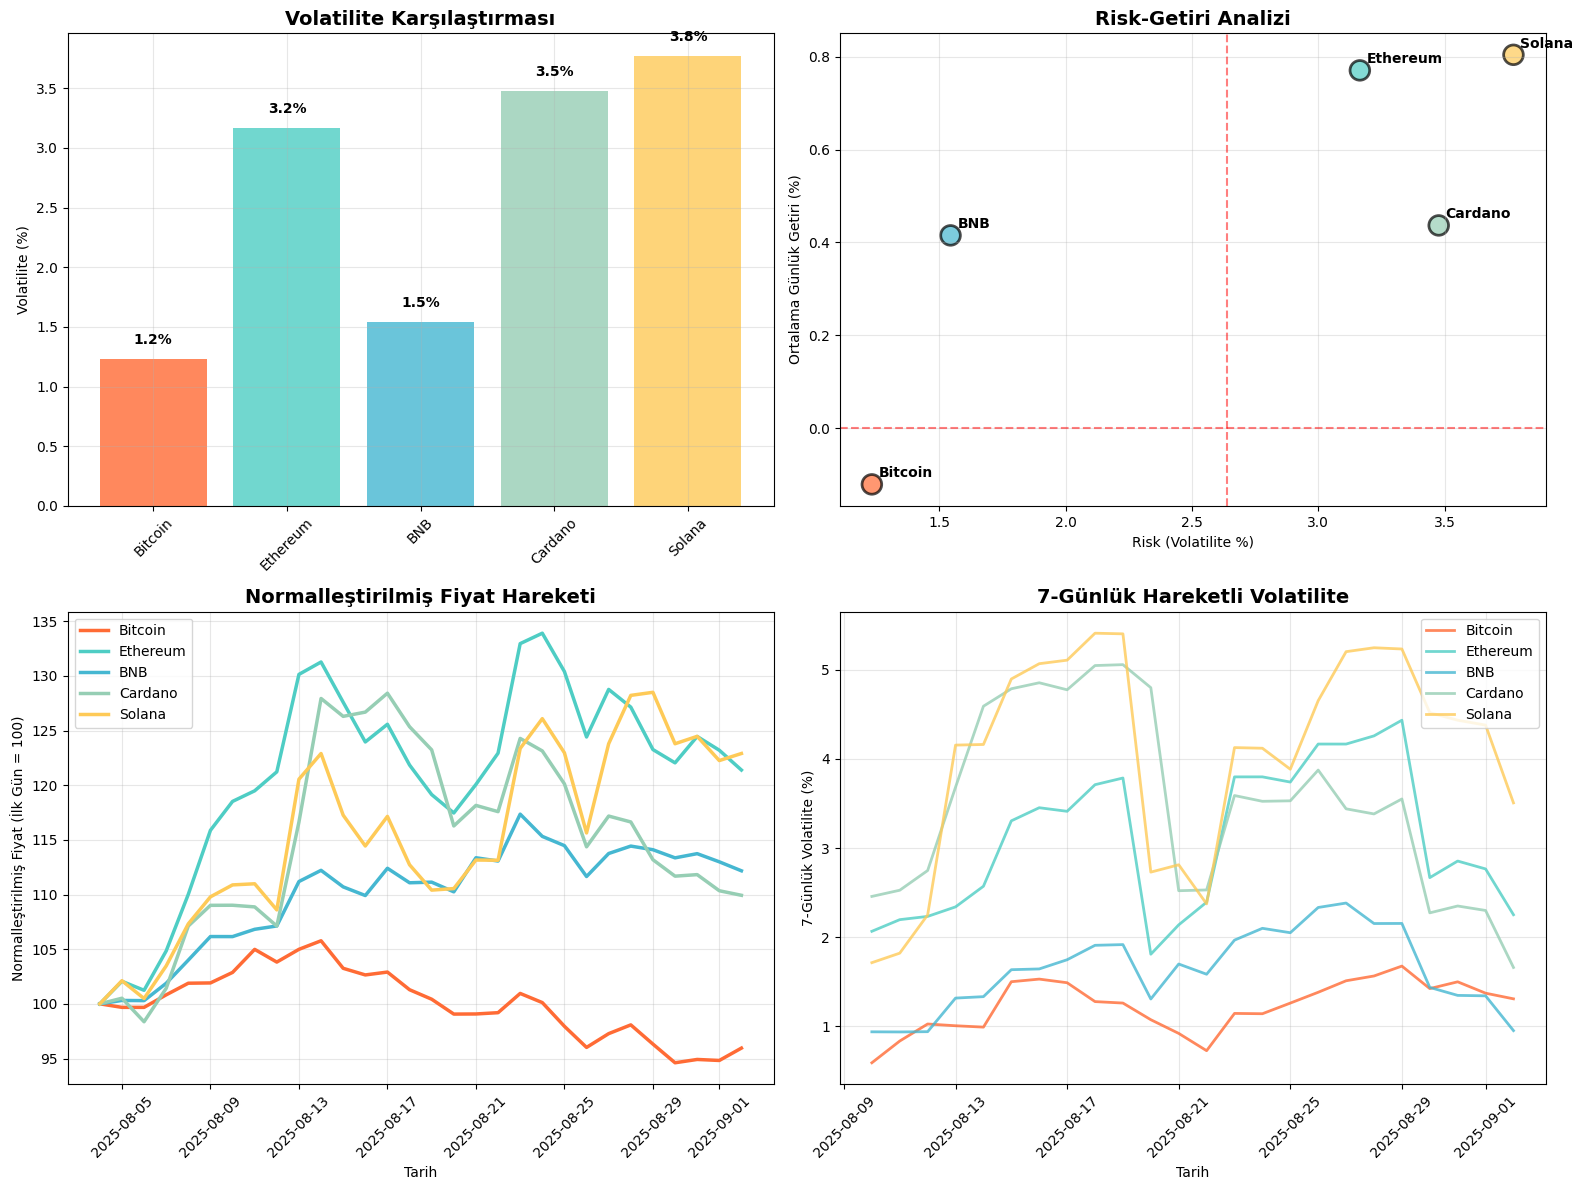


✅ Analiz tamamlandı!
📁 Dosyalar kaydedildi:
  • coklu_kripto_analizi.png
  • coklu_kripto_veri.xlsx
  • kripto_karsilastirma.xlsx


In [4]:
# Tüm verileri birleştir
combined_df = pd.concat(all_data.values(), ignore_index=True)

# Volatilite karşılaştırması
volatility_stats = {}
return_stats = {}

for coin_name in cryptos.values():
    coin_data = combined_df[combined_df['Coin'] == coin_name]
    volatility_stats[coin_name] = coin_data['Gunluk_Getiri'].std()
    return_stats[coin_name] = coin_data['Gunluk_Getiri'].mean()

# Sonuçları DataFrame'e çevir
comparison_df = pd.DataFrame({
    'Coin': list(volatility_stats.keys()),
    'Volatilite': list(volatility_stats.values()),
    'Ortalama_Getiri': list(return_stats.values())
})

print(f"\n📊 VOLATİLİTE SIRALAMASI:")
comparison_sorted = comparison_df.sort_values('Volatilite', ascending=False)
for idx, row in comparison_sorted.iterrows():
    print(f"{row['Coin']:12} - Volatilite: {row['Volatilite']:.2f}% | Ortalama Getiri: {row['Ortalama_Getiri']:+.2f}%")

# Karşılaştırmalı grafikler
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Volatilite karşılaştırması
colors = ['#FF6B35', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57']
bars = ax1.bar(comparison_df['Coin'], comparison_df['Volatilite'], color=colors, alpha=0.8)
ax1.set_title('Volatilite Karşılaştırması', fontsize=14, fontweight='bold')
ax1.set_ylabel('Volatilite (%)')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# Değerleri barların üstüne yaz
for bar, vol in zip(bars, comparison_df['Volatilite']):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             f'{vol:.1f}%', ha='center', va='bottom', fontweight='bold')

# 2. Risk-Getiri scatter plot
ax2.scatter(comparison_df['Volatilite'], comparison_df['Ortalama_Getiri'], 
           s=200, c=colors, alpha=0.7, edgecolors='black', linewidth=2)
ax2.set_xlabel('Risk (Volatilite %)')
ax2.set_ylabel('Ortalama Günlük Getiri (%)')
ax2.set_title('Risk-Getiri Analizi', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.axhline(y=0, color='red', linestyle='--', alpha=0.5)
ax2.axvline(x=comparison_df['Volatilite'].mean(), color='red', linestyle='--', alpha=0.5)

# Coin isimlerini ekle
for idx, row in comparison_df.iterrows():
    ax2.annotate(row['Coin'], 
                (row['Volatilite'], row['Ortalama_Getiri']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=10, fontweight='bold')

# 3. Normalleştirilmiş fiyat karşılaştırması
ax3.set_title('Normalleştirilmiş Fiyat Hareketi', fontsize=14, fontweight='bold')
for i, (coin_name, color) in enumerate(zip(cryptos.values(), colors)):
    coin_data = combined_df[combined_df['Coin'] == coin_name]
    # İlk günü 100 yap (normalleştir)
    normalized_prices = (coin_data['Fiyat_USD'] / coin_data['Fiyat_USD'].iloc[0]) * 100
    ax3.plot(coin_data['Tarih'], normalized_prices, 
             color=color, linewidth=2.5, label=coin_name)

ax3.set_ylabel('Normalleştirilmiş Fiyat (İlk Gün = 100)')
ax3.set_xlabel('Tarih')
ax3.legend(loc='upper left')
ax3.grid(True, alpha=0.3)
ax3.tick_params(axis='x', rotation=45)

# 4. Volatilite zaman serisi
ax4.set_title('7-Günlük Hareketli Volatilite', fontsize=14, fontweight='bold')
for coin_name, color in zip(cryptos.values(), colors):
    coin_data = combined_df[combined_df['Coin'] == coin_name]
    rolling_vol = coin_data['Gunluk_Getiri'].rolling(7).std()
    ax4.plot(coin_data['Tarih'], rolling_vol, 
             color=color, linewidth=2, label=coin_name, alpha=0.8)

ax4.set_ylabel('7-Günlük Volatilite (%)')
ax4.set_xlabel('Tarih')
ax4.legend(loc='upper right')
ax4.grid(True, alpha=0.3)
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('coklu_kripto_analizi.png', dpi=300, bbox_inches='tight')
plt.show()

# Excel'e kaydet
combined_df.to_excel('coklu_kripto_veri.xlsx', index=False)
comparison_df.to_excel('kripto_karsilastirma.xlsx', index=False)

print(f"\n✅ Analiz tamamlandı!")
print(f"📁 Dosyalar kaydedildi:")
print(f"  • coklu_kripto_analizi.png")
print(f"  • coklu_kripto_veri.xlsx") 
print(f"  • kripto_karsilastirma.xlsx")